In [28]:
import cv2 #resize images
import itertools #for number of complex iterations
import os #directories and path
import numpy as np #for arrays
import pandas as pd #handling data
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt #plot graphs/images
get_ipython().run_line_magic('matplotlib', 'inline')

In [29]:
#Training images directory
TrainingSet = os.getcwd() + '\Data1\\train\\train\\'
#Testing images directory
TestingSet = os.getcwd() + '\Data1\\test\\test\\'

#Image dimensions
TotalRows = 64
TotalCols = 64
#As we are using Color images, it has 3 dimensions R G B
TotalChannels = 3

#Loading images from directory
Images_for_Training = [TrainingSet+i for i in os.listdir(TrainingSet)] 
Images_for_Testing =  [TestingSet+i for i in os.listdir(TestingSet)]

In [30]:
#Function to read and resize image as per requirement
def imageDataRead(imagePath):
    image1 = cv2.imread(imagePath, cv2.IMREAD_COLOR)
    #using Color images and hence 3 channels
    return cv2.resize(image1, (TotalRows, TotalCols), interpolation=cv2.INTER_CUBIC)

def dataPreparation(images):
    lenOfImages = len(images)
    #Finding nX value to add dimensions of X_preparation array 
    nX = TotalRows * TotalCols * TotalChannels
    #Generating arrays for both image and its labels
    X_Prep = np.ndarray((nX, lenOfImages), dtype=np.uint8)
    Y_Prep = np.zeros((1, lenOfImages))
    
    #Reshape and bifurcate labels based on cat(0) and dog(1)
    for i, image_file in enumerate(images):
        image = imageDataRead(image_file)
        X_Prep[:, i] = np.squeeze(image.reshape((nX, 1)))
        if 'dog' in image_file.lower():
            Y_Prep[0, i] = 1
        elif 'cat' in image_file.lower():
            Y_Prep[0, i] = 0   
    return X_Prep, Y_Prep

In [31]:
#Processing train and test data
X_train, y_train = dataPreparation(Images_for_Training)
X_test, test_idx = dataPreparation(Images_for_Testing)

classesToPredict = {1:'dog',0:'cat'}

#Function to display final predicted results
def showPredictionResult(X_pred, idx, model):
    img = X_pred[idx].reshape(1, -1)
    imgClass = classesToPredict[model.predict(img).item()]
    img = img.reshape((TotalRows, TotalCols, TotalChannels))
    plt.figure(figsize=(4,2))
    plt.imshow(img)
    plt.title("Image {} Predicted as {}".format(idx, imgClass))
    plt.show()

C:\Users\Karan.Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


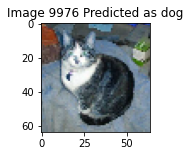

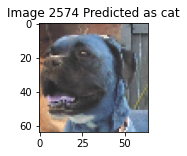

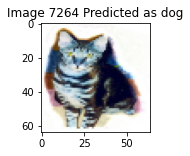

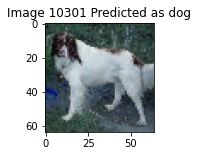

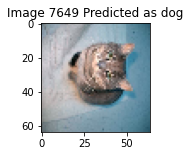

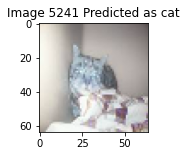

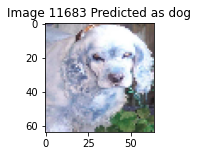

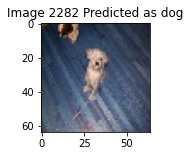

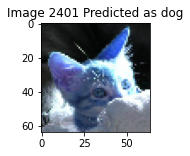

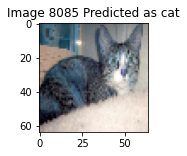

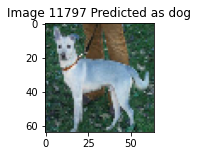

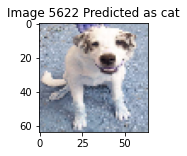

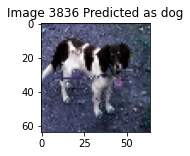

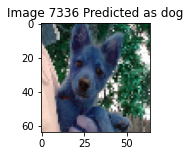

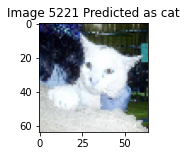

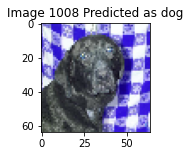

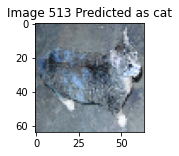

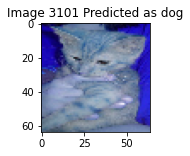

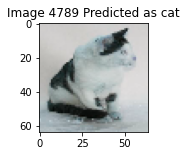

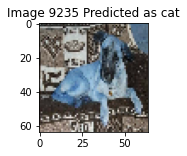

In [32]:
#Using prebuilt Logistic Regression model from sklearn
regression = LogisticRegression(max_iter=100,solver='lbfgs')
X_train_data, y_train_data = X_train.T, y_train.T.ravel()
regression.fit(X_train_data, y_train_data)

#Transpose
X_test_data, test_idx = X_test.T, test_idx.T
for i in np.random.randint(0, len(X_test_data), 20):
    #Calling function to print random 20 images predictions to compare results
    showPredictionResult(X_test_data, i, regression)

In [33]:
#Once compared images and label above. Calculating accuracy of overall dataset
print("Accuracy of Model is: {:.3f}%".format(regression.score(X_train_data, y_train_data)*100))

Accuracy of Model is: 70.024%
